In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def split_and_flatten_image(img):
    """Split image into RGB channels and flatten them into 1D arrays."""
    r, g, b = cv2.split(img)
    r = np.array(r.flatten())
    g = np.array(g.flatten())
    b = np.array(b.flatten())
    return r, g, b


def dist(a, b):
    """Calculate Euclidean distance between two RGB points."""
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)


In [3]:
def initialize_centroids(k):
    """Initialize k random centroids with RGB values in range [0, 255]."""
    return np.array([[random.randint(0, 255),
                      random.randint(0, 255),
                      random.randint(0, 255)] for _ in range(k)])


def perform_kmeans_clustering(r, g, b, k, max_iter):
    """Perform K-means clustering on RGB pixel data."""
    pixels = len(r)
    centroids = initialize_centroids(k)
    moved = True
    iter = 0
    assignment = [0] * pixels

    while moved and iter <= max_iter:
        iter += 1
        assignment = [0] * pixels

        # Assign pixels to nearest centroid
        for i in range(pixels):
            distances = [0] * k
            for j in range(k):
                distances[j] = dist(centroids[j], [r[i], g[i], b[i]])
            nearest = np.argmin(distances)
            assignment[i] = nearest

        prev_centroids = centroids.copy()

        # Update centroids
        for i in range(k):
            ind = [j for j in range(pixels) if assignment[j] == i]
            if len(ind) != 0:
                centroids[i][0] = np.mean(r[ind])
                centroids[i][1] = np.mean(g[ind])
                centroids[i][2] = np.mean(b[ind])
            else:
                centroids[i][0] = 0
                centroids[i][1] = 0
                centroids[i][2] = 0

        # Check if centroids moved
        if np.array_equal(centroids, prev_centroids):
            moved = False

    return assignment, centroids


In [4]:
def reconstruct_clustered_image(r, g, b, img_shape, k, assignment, centroids):
    """Reconstruct the image using cluster centroids."""
    r_copy = np.array(r.copy())
    g_copy = np.array(g.copy())
    b_copy = np.array(b.copy())

    # Update pixels to centroid colors
    for i in range(k):
        ind = [j for j in range(len(r)) if assignment[j] == i]
        r_copy[ind] = centroids[i][0]
        g_copy[ind] = centroids[i][1]
        b_copy[ind] = centroids[i][2]

    # Compile channels
    img2 = np.array([r_copy, g_copy, b_copy])
    img2 = img2.transpose()
    img2 = img2.reshape(img_shape)
    return img2


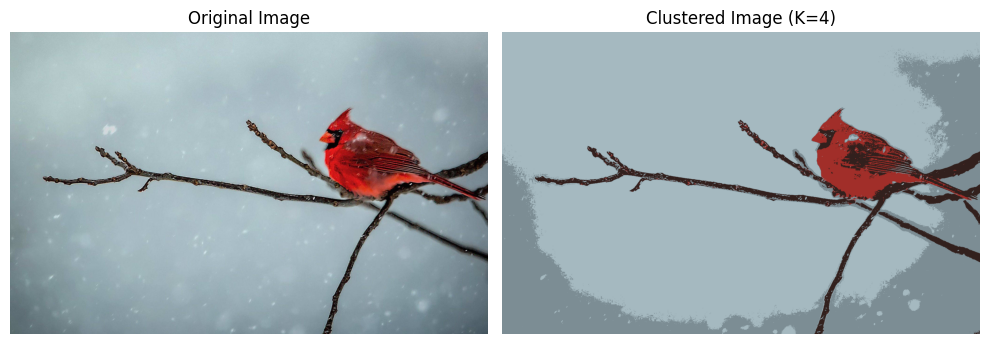

In [8]:
file_path = r"red_bird.jpg"
k = 4
max_iter = 8

# Load and display original image
img = cv2.imread(file_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split and flatten image
r, g, b = split_and_flatten_image(img)

# Perform K-means clustering
assignment, centroids = perform_kmeans_clustering(r, g, b, k, max_iter)

# Reconstruct and display clustered image
img2 = reconstruct_clustered_image(r, g, b, img.shape, k, assignment, centroids)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create 1x2 subplot

# Original image
ax1.axis('off')
ax1.set_title('Original Image')
ax1.imshow(img)

# Clustered image
ax2.axis('off')
ax2.set_title('Clustered Image (K=4)')
ax2.imshow(img2)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

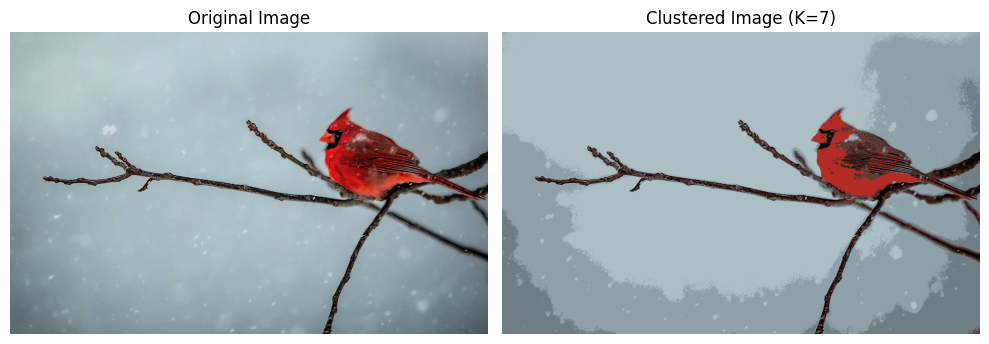

In [9]:
k = 7
max_iter = 8

# Perform K-means clustering
assignment, centroids = perform_kmeans_clustering(r, g, b, k, max_iter)

# Reconstruct and display clustered image
img2 = reconstruct_clustered_image(r, g, b, img.shape, k, assignment, centroids)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create 1x2 subplot

# Original image
ax1.axis('off')
ax1.set_title('Original Image')
ax1.imshow(img)

# Clustered image
ax2.axis('off')
ax2.set_title('Clustered Image (K=7)')
ax2.imshow(img2)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()